In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds_train = pd.read_csv('outputs/df_train.csv')
diamonds_train_price = pd.read_csv('outputs/df_train_price.csv')
diamonds_predict=pd.read_csv('outputs/df_test.csv')
submit=pd.read_csv('inputs/sample_submission.csv')

In [3]:
diamonds_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096


In [4]:
diamonds_predict.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505


# Split train and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamonds_train, diamonds_train_price, test_size=0.05)

In [6]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
10886,0.471275,-0.810564,1.529377,-0.641579,-1.010919,-0.650176,0.731857,0.726966,0.595246
15980,-0.438073,0.982588,0.940769,1.182263,0.177072,-1.097476,-0.311603,-0.263424,-0.264456
16029,-0.501516,0.982588,-0.825055,-1.249527,-0.731391,-0.650176,-0.347277,-0.315550,-0.405390
13005,-0.163154,-2.603715,1.529377,-0.033632,2.553053,-0.650176,-0.044049,-0.115734,0.214722
17252,0.450128,-2.603715,0.940769,-0.641579,5.418206,-1.097476,0.241342,0.179645,0.863022


In [7]:
y_test.shape

(2023, 1)

# RandomForestRegressor fast test

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
rf_classifier = RandomForestRegressor(n_estimators=500, max_depth=15, min_samples_leaf=3, 
                                       n_jobs=-1)


In [10]:
rf_classifier.fit(X_train, y_train)
#print(rf_reg.score(X_train, y_train))
#print(rf_reg.score(X_test, y_test))

/home/must4in3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [11]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
df_y = pd.DataFrame(y_pred)

In [ ]:
df_y['id'] = df_y.index

In [ ]:
df_y['price'] = df_y[0]

In [ ]:
df_y = df_y[['id', 'price']]

In [ ]:
df_y

In [ ]:
df_y.to_csv('rf500-35-3.csv', index=False)

In [12]:
y_test_rf = y_test.copy()
y_test_rf['y']= y_pred

In [13]:
y_test_rf['Price-y'] = abs(y_test_rf['price']- y_test_rf['y'])
y_test_rf.describe()

,price,y,Price-y
count,2023.000000,2023.000000,2023.000000
mean,3915.263964,3915.087520,269.414186
std,3943.891709,3866.748498,461.024883
min,367.000000,360.804052,0.027306
25%,949.000000,921.746965,35.421109
50%,2423.000000,2512.001573,95.029825
75%,5291.500000,5325.156922,283.241055
max,18818.000000,17914.823234,5039.281287


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
print( "Errore quadratico medio:% .2f" % mean_squared_error ( y_test_rf['price'], y_test_rf['y']))
print( 'R²:% .2f' % r2_score ( y_test_rf['price'], y_test_rf['y']))

Errore quadratico medio: 285022.88
R²: 0.98


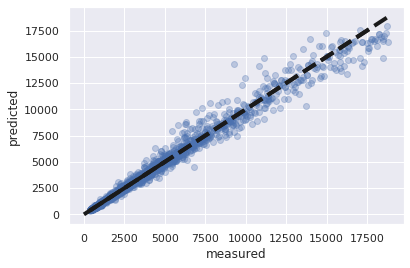

In [15]:
sns.set()
fig, ax = plt.subplots()
ax.scatter( y_test_rf['price'], y_test_rf['y'], alpha=.3)
ax.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'RMSE={mean_squared_error(y_pred, y_test)**0.5}')

RMSE=533.875343545384
